<img src="./unal.png" align=left width="150" height="150"></img>

$\;$
---

<h2 align="center">RUTINA DE FILTRADO DE DATOS</h2>



---


Temperature (°C)
https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data#GlobalLandTemperaturesByCountry.csv

Topic
https://data.worldbank.org/topic/climate-change

CO2 (kt)
https://data.worldbank.org/indicator/EN.ATM.CO2E.KT

Forest (km2)
https://data.worldbank.org/indicator/AG.LND.FRST.K2

Agricultura (km2)
https://data.worldbank.org/indicator/AG.LND.AGRI.K2

Population (7mM)
https://data.worldbank.org/indicator/SP.POP.TOTL

Electric power consumption (kWh per capita)
https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
%cd '/content/drive/My Drive/Colab Notebooks/db'

/content/drive/My Drive/Colab Notebooks/db


In [5]:
!ls

API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv	Meteorite_Landings.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv	poblacion.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv	test.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv	test.hdf
API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv	test.json
covid_19.csv					test.parquet
GlobalLandTemperaturesByCountry.csv		test.pkl
london_merged.csv				test.xlsx


In [4]:
import pandas as pd
import numpy as np

El DataFrame hace referencia a un listado de países: **Country**, la temperatura promedio: **AverageTemperature**, etc. puede observarse una serie de **NaN** aqí iniciara el preprocesamiento.

In [7]:
df_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df_temp

dt  AverageTemperature  AverageTemperatureUncertainty   Country
0       1743-11-01               4.384                          2.294     Åland
1       1743-12-01                 NaN                            NaN     Åland
2       1744-01-01                 NaN                            NaN     Åland
3       1744-02-01                 NaN                            NaN     Åland
4       1744-03-01                 NaN                            NaN     Åland
...            ...                 ...                            ...       ...
577457  2013-05-01              19.059                          1.022  Zimbabwe
577458  2013-06-01              17.613                          0.473  Zimbabwe
577459  2013-07-01              17.000                          0.453  Zimbabwe
577460  2013-08-01              19.759                          0.717  Zimbabwe
577461  2013-09-01                 NaN                            NaN  Zimbabwe

[577462 rows x 4 columns]

In [3]:
df_temp.shape

(577462, 4)

In [9]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [10]:
df_temp['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [11]:
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

Filtrando unos valores especificos de la historia (desde 1970)

In [12]:
idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]
df_temp

dt  AverageTemperature  ...   Country       year
2715    1970-02-01             -10.835  ...     Åland 1970-02-01
2716    1970-03-01              -1.583  ...     Åland 1970-03-01
2717    1970-04-01               0.493  ...     Åland 1970-04-01
2718    1970-05-01               6.939  ...     Åland 1970-05-01
2719    1970-06-01              14.252  ...     Åland 1970-06-01
...            ...                 ...  ...       ...        ...
577457  2013-05-01              19.059  ...  Zimbabwe 2013-05-01
577458  2013-06-01              17.613  ...  Zimbabwe 2013-06-01
577459  2013-07-01              17.000  ...  Zimbabwe 2013-07-01
577460  2013-08-01              19.759  ...  Zimbabwe 2013-08-01
577461  2013-09-01                 NaN  ...  Zimbabwe 2013-09-01

[127332 rows x 5 columns]

Usamos **groupby** para agrupar por fecha y por  país en pro de encontrar el promedio anual para la temperatura. Para agrupar por fecha ha de cosiderarse que **Grouper** es ideal

In [13]:
df_t_avg = df_temp.groupby(['Country',
                 pd.Grouper(key='year', freq='1Y')                     #'1Y' es cada año
]).agg({'AverageTemperature':[np.mean,np.median]})
df_t_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

In [14]:
df_t_avg.xs('Russia')['AverageTemperature']    #xs nos permite seleccionar un pais de nuestro indice

mean  median
year                        
1970-12-31 -3.682273 -5.5340
1971-12-31 -4.971167 -5.0775
1972-12-31 -5.702000 -3.9820
1973-12-31 -4.833583 -4.9640
1974-12-31 -5.671750 -5.1405
1975-12-31 -4.141083 -3.8215
1976-12-31 -5.927000 -6.1275
1977-12-31 -5.513000 -5.4425
1978-12-31 -5.255917 -4.5995
1979-12-31 -5.904333 -6.8865
1980-12-31 -5.420750 -5.3175
1981-12-31 -4.166167 -3.9805
1982-12-31 -5.097583 -4.7275
1983-12-31 -3.951833 -4.5875
1984-12-31 -5.294250 -6.0225
1985-12-31 -5.521167 -4.4820
1986-12-31 -4.892250 -4.0315
1987-12-31 -6.274000 -5.8700
1988-12-31 -4.330417 -4.1680
1989-12-31 -4.073250 -4.8560
1990-12-31 -4.022917 -2.9900
1991-12-31 -4.237000 -3.0185
1992-12-31 -4.903250 -5.7380
1993-12-31 -4.621750 -4.9830
1994-12-31 -4.898417 -3.3325
1995-12-31 -3.130167 -2.5975
1996-12-31 -4.810333 -4.9565
1997-12-31 -4.296500 -1.5540
1998-12-31 -5.281083 -5.8235
1999-12-31 -4.829750 -4.2760
2000-12-31 -4.545667 -3.5550
2001-12-31 -4.490667 -4.3710
2002-12-31 -4.122917 -4.4200
2003-12-31 -3.832833 -3.4205
2004-12-31 -4.493583 -4.9885
2005-12-31 -3.498083 -2.7760
2006-12-31 -4.763000 -5.8115
2007-12-31 -2.975083 -1.5785
2008-12-31 -3.305417 -2.9605
2009-12-31 -4.608500 -2.8810
2010-12-31 -4.520583 -3.7295
2011-12-31 -3.401583 -1.5135
2012-12-31 -3.901750 -2.6055
2013-12-31 -2.263125  1.6635

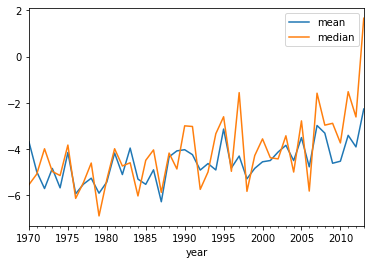

In [15]:
df_t_avg.xs('Russia')['AverageTemperature'].plot() 

Aqí puede observarse que la temperatura en país seleccionado (Russia) va aumentando al apsar el tiempo.

In [16]:
df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()
df_t_med

Country       year   median
0      Afghanistan 1970-12-31  16.1990
1      Afghanistan 1971-12-31  14.9340
2      Afghanistan 1972-12-31  13.8725
3      Afghanistan 1973-12-31  14.9130
4      Afghanistan 1974-12-31  13.6160
...            ...        ...      ...
10687        Åland 2009-12-31   5.5765
10688        Åland 2010-12-31   4.7550
10689        Åland 2011-12-31   7.4990
10690        Åland 2012-12-31   6.2540
10691        Åland 2013-12-31   6.0140

[10692 rows x 3 columns]

In [17]:
df_t_med['date'] = df_t_med['year'].dt.year     #permite extraer el año
df_t_med['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

Renombrando columnas

In [18]:
df_t_med.rename(columns={'median':'temperature'}, inplace=True)   #inplace permite fijar el nombre en el df original
df_t_med

Country       year  temperature  date
0      Afghanistan 1970-12-31      16.1990  1970
1      Afghanistan 1971-12-31      14.9340  1971
2      Afghanistan 1972-12-31      13.8725  1972
3      Afghanistan 1973-12-31      14.9130  1973
4      Afghanistan 1974-12-31      13.6160  1974
...            ...        ...          ...   ...
10687        Åland 2009-12-31       5.5765  2009
10688        Åland 2010-12-31       4.7550  2010
10689        Åland 2011-12-31       7.4990  2011
10690        Åland 2012-12-31       6.2540  2012
10691        Åland 2013-12-31       6.0140  2013

[10692 rows x 4 columns]

---
# Boxplot
---

In [19]:
df_t_pivot = df_t_med.pivot_table(values='temperature', index='date', columns='Country')
df_t_pivot

Country  Afghanistan   Africa  Albania  ...   Zambia  Zimbabwe   Åland
date                                    ...                           
1970         16.1990  25.2360  12.4230  ...  22.1330   23.2560  6.9340
1971         14.9340  24.7755  11.6735  ...  21.8265   22.7055  4.4870
1972         13.8725  25.1230  11.2175  ...  21.9800   22.3980  5.6200
1973         14.9130  25.3445  11.8370  ...  22.1090   22.5815  3.5795
1974         13.6160  24.8260  11.3210  ...  21.6005   21.3255  5.4550
1975         13.5130  24.8045  12.3595  ...  21.8635   21.7910  6.0170
1976         14.1615  24.8225  12.6080  ...  21.6980   21.9880  4.3855
1977         15.6575  25.0345  11.9870  ...  22.1670   22.2910  5.4745
1978         15.2580  24.9135  11.5490  ...  22.1010   22.6210  5.7475
1979         16.2990  25.3705  11.7765  ...  22.2165   22.7160  4.6730
1980         16.3110  25.2955  11.9060  ...  22.4310   22.2040  4.5410
1981         14.4390  25.2910  13.3060  ...  22.3740   21.6195  4.8730
1982         15.0705  25.1225  12.4050  ...  22.7425   22.3540  6.4350
1983         13.6025  25.4250  12.6770  ...  23.0990   23.3410  5.1200
1984         14.4185  25.2940  12.7785  ...  22.5665   23.3255  6.7930
1985         14.8955  24.9255  12.6220  ...  22.4485   22.4450  3.8720
1986         15.1815  25.1730  13.3720  ...  22.2760   22.4890  6.4775
1987         13.6260  25.5695  12.5730  ...  23.1640   23.3280  4.4655
1988         15.2810  25.4000  12.3825  ...  22.6545   22.8105  3.9515
1989         14.6015  25.1320  12.9095  ...  22.4170   22.5005  5.6370
1990         14.4935  25.6785  13.4490  ...  22.7115   22.8805  6.1945
1991         14.3920  25.2885  11.5885  ...  22.3795   23.3265  5.4660
1992         13.7520  25.4245  13.5850  ...  23.2185   24.1030  3.2440
1993         14.0685  25.6620  13.6500  ...  22.0050   22.6745  4.7270
1994         13.6150  25.2650  13.2390  ...  22.1780   22.5795  5.2915
1995         14.4835  25.5005  11.8750  ...  22.7600   23.4275  4.4450
1996         14.5665  25.3650  11.7315  ...  22.3725   22.6680  5.0130
1997         15.2480  25.4135  10.7790  ...  22.3355   22.6220  4.1280
1998         15.7670  25.9285  13.4790  ...  22.7895   22.9400  4.5975
1999         15.5875  25.5770  13.5485  ...  22.0465   22.3720  6.0360
2000         16.8560  25.4540  13.9625  ...  22.2105   22.7690  7.8450
2001         16.3620  25.8030  13.7490  ...  22.1860   22.7205  5.6560
2002         16.4970  25.7410  12.5335  ...  23.1025   23.1010  3.9725
2003         15.4800  26.0325  12.1450  ...  22.9690   22.8095  4.9515
2004         14.6700  25.7840  13.6610  ...  22.4920   22.1475  5.8705
2005         15.5190  26.0680  12.4485  ...  22.9420   22.9180  6.4785
2006         16.6300  25.9285  13.6685  ...  22.2425   22.0520  6.5160
2007         15.4785  25.6990  13.1770  ...  22.2380   22.9095  6.2955
2008         16.3810  25.6660  13.2985  ...  21.5855   22.4170  6.5450
2009         13.8930  25.8935  13.1795  ...  22.1360   22.4860  5.5765
2010         17.4285  26.1595  12.6825  ...  22.6880   23.3040  4.7550
2011         16.0240  25.6220  12.4440  ...  22.0270   22.9420  7.4990
2012         15.6755  25.5670  13.9060  ...  22.4530   23.0455  6.2540
2013         18.1000  25.7865  15.9465  ...  21.2985   20.4505  6.0140

[44 rows x 242 columns]

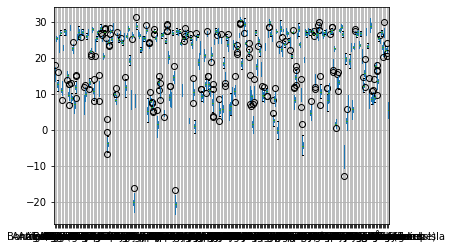

In [20]:
df_t_pivot.boxplot()

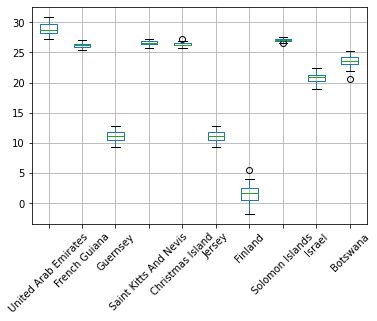

In [21]:
df_t_pivot.T.sample(10).T.boxplot(rot=45)

---
# csa
---

Topic https://data.worldbank.org/topic/climate-change

CO2 (kt) https://data.worldbank.org/indicator/EN.ATM.CO2E.KT

Forest (km2) https://data.worldbank.org/indicator/AG.LND.FRST.K2

Agricultura (km2) https://data.worldbank.org/indicator/AG.LND.AGRI.K2

Population (7mM) https://data.worldbank.org/indicator/SP.POP.TOTL

Electric power consumption (kWh per capita) https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC

In [22]:
!ls

API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv	Meteorite_Landings.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv	poblacion.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv	test.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv	test.hdf
API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv	test.json
covid_19.csv					test.parquet
GlobalLandTemperaturesByCountry.csv		test.pkl
london_merged.csv				test.xlsx


In [23]:
df_agri = pd.read_csv('API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv',header=2)
df_fore = pd.read_csv('API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv',header=2)
df_elec = pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv',header=2)
df_co2e = pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv',header=2)
df_popu = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv',header=2)

In [24]:
df_popu

Country Name Country Code  ... 2019 Unnamed: 64
0           Aruba          ABW  ...  NaN         NaN
1     Afghanistan          AFG  ...  NaN         NaN
2          Angola          AGO  ...  NaN         NaN
3         Albania          ALB  ...  NaN         NaN
4         Andorra          AND  ...  NaN         NaN
..            ...          ...  ...  ...         ...
259        Kosovo          XKX  ...  NaN         NaN
260   Yemen, Rep.          YEM  ...  NaN         NaN
261  South Africa          ZAF  ...  NaN         NaN
262        Zambia          ZMB  ...  NaN         NaN
263      Zimbabwe          ZWE  ...  NaN         NaN

[264 rows x 65 columns]

In [25]:
range(1971,2015)
map(str,range(1971,2015))         #genera una lista de años en formato texto
cols = ['Country Name','Country Code'] + list(map(str,range(1971,2015)))  #columnas a trabajar en el df
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

melt 

In [26]:
df_agri.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':'agriculture'})

Country name  date  agriculture
0             Aruba  ABW  1971         20.0
1       Afghanistan  AFG  1971     380360.0
2            Angola  AGO  1971     574000.0
3           Albania  ALB  1971      12000.0
4           Andorra  AND  1971        250.0
...             ...  ...   ...          ...
11611        Kosovo  XKX  2014          NaN
11612   Yemen, Rep.  YEM  2014     235460.0
11613  South Africa  ZAF  2014     968410.0
11614        Zambia  ZMB  2014     238360.0
11615      Zimbabwe  ZWE  2014     162000.0

[11616 rows x 4 columns]

In [27]:
def fun_format(df, col = 'agriculture'):
  return df.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
      columns={'variable':'date',
              'Country Name':'Country',
              'Country Code':'name',
              'value':col})

In [28]:
df_agri = fun_format(df_agri, col = 'agriculture')
df_fore = fun_format(df_fore, col = 'forest')
df_elec = fun_format(df_elec, col = 'electricprod')
df_co2e = fun_format(df_co2e, col = 'co2')
df_popu = fun_format(df_popu, col = 'population')
df_popu

Country name  date  population
0             Aruba  ABW  1971     59440.0
1       Afghanistan  AFG  1971  11475445.0
2            Angola  AGO  1971   6040777.0
3           Albania  ALB  1971   2187853.0
4           Andorra  AND  1971     25559.0
...             ...  ...   ...         ...
11611        Kosovo  XKX  2014   1821800.0
11612   Yemen, Rep.  YEM  2014  25823485.0
11613  South Africa  ZAF  2014  54545991.0
11614        Zambia  ZMB  2014  15399753.0
11615      Zimbabwe  ZWE  2014  13586681.0

[11616 rows x 4 columns]

In [29]:
df_t_med

Country       year  temperature  date
0      Afghanistan 1970-12-31      16.1990  1970
1      Afghanistan 1971-12-31      14.9340  1971
2      Afghanistan 1972-12-31      13.8725  1972
3      Afghanistan 1973-12-31      14.9130  1973
4      Afghanistan 1974-12-31      13.6160  1974
...            ...        ...          ...   ...
10687        Åland 2009-12-31       5.5765  2009
10688        Åland 2010-12-31       4.7550  2010
10689        Åland 2011-12-31       7.4990  2011
10690        Åland 2012-12-31       6.2540  2012
10691        Åland 2013-12-31       6.0140  2013

[10692 rows x 4 columns]

In [30]:
df_popu['date'] = df_popu['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_agri['date'] = df_agri['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11616 non-null  object 
 1   name        11616 non-null  object 
 2   date        11616 non-null  float64
 3   population  11501 non-null  float64
dtypes: float64(2), object(2)
memory usage: 363.1+ KB


In [31]:
df_merge = pd.merge(df_t_med[['Country','temperature','date']],
                    df_popu, on = ['Country','date'], how = 'inner')

In [32]:
df_merge

Country  temperature  date name  population
0     Afghanistan      14.9340  1971  AFG  11475445.0
1     Afghanistan      13.8725  1972  AFG  11791215.0
2     Afghanistan      14.9130  1973  AFG  12108963.0
3     Afghanistan      13.6160  1974  AFG  12412950.0
4     Afghanistan      13.5130  1975  AFG  12689160.0
...           ...          ...   ...  ...         ...
7219     Zimbabwe      22.4860  2009  ZWE  12526968.0
7220     Zimbabwe      23.3040  2010  ZWE  12697723.0
7221     Zimbabwe      22.9420  2011  ZWE  12894316.0
7222     Zimbabwe      23.0455  2012  ZWE  13115131.0
7223     Zimbabwe      20.4505  2013  ZWE  13350356.0

[7224 rows x 5 columns]

In [33]:
df_merge = pd.merge(df_merge,
                    df_co2e,
                    on = ['Country','name','date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_elec,
                    on = ['Country','name','date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_agri,
                    on = ['Country','name','date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_fore,
                    on = ['Country','name','date'],
                    how = 'inner')
df_merge

Country  temperature  date  ... electricprod  agriculture         forest
0     Afghanistan      14.9340  1971  ...          NaN     380360.0            NaN
1     Afghanistan      13.8725  1972  ...          NaN     380460.0            NaN
2     Afghanistan      14.9130  1973  ...          NaN     380480.0            NaN
3     Afghanistan      13.6160  1974  ...          NaN     380480.0            NaN
4     Afghanistan      13.5130  1975  ...          NaN     380480.0            NaN
...           ...          ...   ...  ...          ...          ...            ...
7219     Zimbabwe      22.4860  2009  ...   585.456912     163000.0  159510.000000
7220     Zimbabwe      23.3040  2010  ...   606.644199     162000.0  156240.000000
7221     Zimbabwe      22.9420  2011  ...   636.249337     164000.0  153115.996094
7222     Zimbabwe      23.0455  2012  ...   608.762505     162000.0  149992.001953
7223     Zimbabwe      20.4505  2013  ...   628.747278     162000.0  146867.998047

[7224 rows x 9 columns]

In [34]:
df_climate = df_merge.dropna()

In [35]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America    5.886300e+06
United States    5.382124e+06
China            3.668918e+06
Japan            1.202083e+06
India            1.047706e+06
                     ...     
Haiti            1.651984e+03
Mozambique       1.584144e+03
Togo             1.285284e+03
Niger            7.847380e+02
Eritrea          6.142225e+02
Name: co2, Length: 120, dtype: float64

In [36]:
pd.set_option('display.float_format', '{:,.1f}'.format)

In [37]:
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index
first_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

In [38]:
df_max_co2 = df_climate[df_climate['Country'].isin([ 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'])]
df_max_co2

Country  temperature  date  ... electricprod  agriculture      forest
1266         Canada         -4.6  1990  ...     16,167.4    677,680.0 3,482,730.0
1267         Canada         -4.2  1991  ...     16,181.6    677,530.0 3,482,259.1
1268         Canada         -5.0  1992  ...     16,164.4    678,140.0 3,481,788.1
1269         Canada         -4.0  1993  ...     16,320.1    678,740.0 3,481,316.9
1270         Canada         -3.4  1994  ...     16,388.3    679,340.0 3,480,845.9
...             ...          ...   ...  ...          ...          ...         ...
7004  United States          8.4  2009  ...     12,913.7  4,099,606.9 3,079,274.1
7005  United States         10.2  2010  ...     13,394.9  4,084,261.9 3,087,200.0
7006  United States          9.5  2011  ...     13,246.0  4,046,693.1 3,089,950.0
7007  United States          9.9  2012  ...     12,964.3  4,087,065.0 3,092,700.0
7008  United States         14.1  2013  ...     13,004.1  4,058,416.9 3,095,450.0

[215 rows x 9 columns]

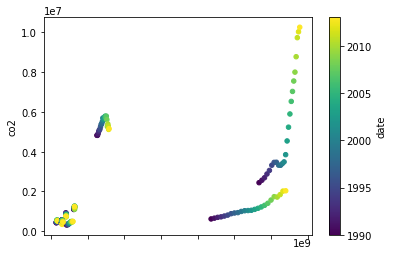

In [39]:
df_max_co2.set_index('Country').plot.scatter(
    x='population',
    y='co2',
    c='date',
    colormap='viridis')

In [40]:
df_climate.corr()

temperature  date  population  ...  electricprod  agriculture  forest
temperature           1.0   0.0        -0.0  ...          -0.4         -0.1    -0.1
date                  0.0   1.0         0.0  ...           0.1         -0.0    -0.0
population           -0.0   0.0         1.0  ...          -0.0          0.6     0.4
co2                  -0.2   0.0         0.6  ...           0.2          0.8     0.7
electricprod         -0.4   0.1        -0.0  ...           1.0          0.1     0.2
agriculture          -0.1  -0.0         0.6  ...           0.1          1.0     0.7
forest               -0.1  -0.0         0.4  ...           0.2          0.7     1.0

[7 rows x 7 columns]

In [41]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


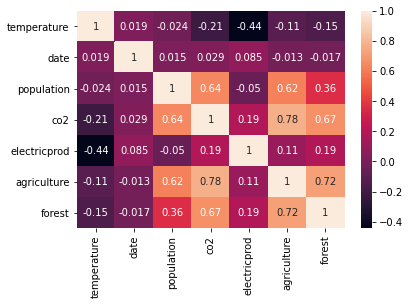

In [42]:
sns.heatmap(df_climate.corr(), annot=True)

In [43]:
df_med = df_climate.groupby('date').median()
df_med

temperature   population      co2  electricprod  agriculture   forest
date                                                                       
1990         22.7 10,213,863.0 31,363.9       1,114.7     90,195.0 54,005.0
1991         22.4 10,346,663.5 27,343.0       1,072.5     91,870.0 60,307.5
1992         19.9  9,188,305.5 26,420.7       1,451.8     89,700.0 45,621.0
1993         20.6  9,951,683.5 28,267.1       1,520.3     89,890.0 44,579.0
1994         20.7  9,991,525.0 29,640.4       1,576.8     89,150.0 42,572.0
1995         20.1 10,026,176.0 29,090.3       1,578.3     81,080.0 41,640.0
1996         20.2 10,063,945.0 30,670.8       1,687.1     79,870.0 41,270.0
1997         20.4 10,108,977.0 30,623.1       1,762.4     80,120.0 41,270.0
1998         21.5 10,069,000.0 31,675.5       1,807.3     80,550.0 40,834.0
1999         21.1 10,140,561.0 31,407.9       1,746.0     84,130.0 39,917.0
2000         20.9 10,210,971.0 30,296.8       1,897.4     80,660.0 38,380.0
2001         21.5 10,187,576.0 32,456.6       1,834.2     77,850.0 38,406.0
2002         21.0 10,196,916.0 33,201.0       1,872.4     75,320.0 37,944.0
2003         21.2 10,193,998.0 32,390.6       2,001.0     75,670.0 38,458.0
2004         21.0 10,197,101.0 32,089.9       1,956.2     75,270.0 38,484.0
2005         20.9 10,211,216.0 34,337.8       2,047.7     75,220.0 38,510.0
2006         20.8 10,201,214.0 39,167.2       2,179.1     74,440.0 37,822.0
2007         20.7 10,298,828.0 37,986.5       2,254.3     74,120.0 38,124.0
2008         21.4 10,384,603.0 40,403.0       2,316.6     74,450.0 38,084.0
2009         20.6 10,443,936.0 41,103.4       2,314.7     75,344.0 37,652.0
2010         21.0 10,474,410.0 40,054.6       2,382.1     74,890.0 37,370.0
2011         20.6 10,526,824.0 37,788.4       2,421.4     74,633.0 38,080.0
2012         21.7 10,514,844.0 36,428.0       2,443.6     75,069.0 38,636.0
2013         20.4 10,542,376.0 39,599.9       2,533.3     75,130.0 38,654.0

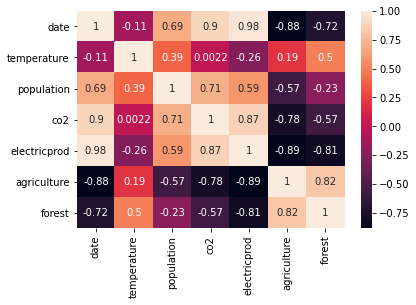

In [44]:
sns.heatmap(df_med.reset_index().corr(),annot=True)

In [45]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7531f5908>,
      dtype=object)

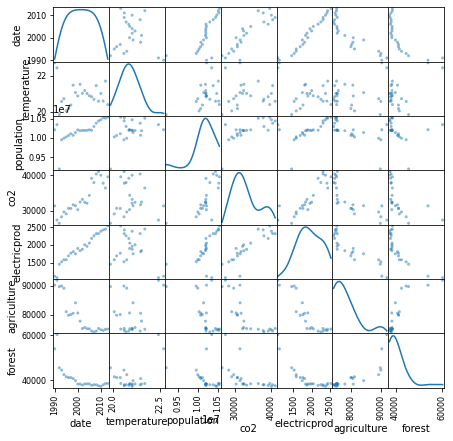

In [46]:
scatter_matrix(df_med.reset_index(),diagonal='kde', figsize = (7,7))

In [47]:
from pandas.plotting import parallel_coordinates

In [48]:
df_samerica = df_climate[
df_climate['Country'].isin(['Colombia',
     'Argentina',
     'Bolivia',
     'Mexico',
     'Peru',
     'Chile'])
][['Country',
 'temperature',
 'co2',
 'agriculture',
 'forest']]

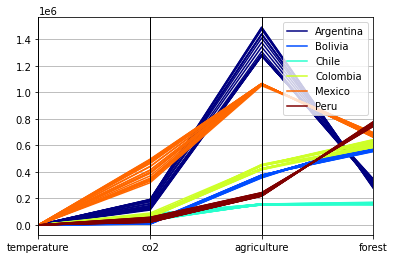

In [49]:
parallel_coordinates(df_samerica, 'Country', colormap = 'jet')